In [1]:
import mysql.connector 
from mysql.connector import errorcode
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
from time import sleep
from random import randint
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [94]:
DB_NAME = 'movies'

cnx = mysql.connector.connect(
    host = "ms-proj-db.ckhgdgqfsqpw.us-east-2.rds.amazonaws.com",
    user = "admin",
    passwd = "12345678",
    database = DB_NAME
)
cursor = cnx.cursor(buffered=True)

In [95]:
cursor.execute("""
SELECT *
FROM movies.budget
;
""")
general_df = pd.DataFrame(cursor.fetchall())
general_df.columns = [x[0] for x in cursor.description]
general_df.set_index(keys = 'Lifetime_Gross_Rank', inplace = True)
general_df

,Movie_Title,Lifetime_Gross,Movie_Year,URL
Lifetime_Gross_Rank,,,,
1.0,Avengers: Endgame,2.797800e+09,2019.0,https://www.boxofficemojo.com/title/tt4154796/...
2.0,Avatar,2.790440e+09,2009.0,https://www.boxofficemojo.com/title/tt0499549/...
3.0,Titanic,2.194440e+09,1997.0,https://www.boxofficemojo.com/title/tt0120338/...
4.0,Star Wars: Episode VII - The Force Awakens,2.068220e+09,2015.0,https://www.boxofficemojo.com/title/tt2488496/...
5.0,Avengers: Infinity War,2.048360e+09,2018.0,https://www.boxofficemojo.com/title/tt4154756/...
...,...,...,...,...
596.0,Halloween,2.554850e+08,2018.0,https://www.boxofficemojo.com/title/tt1502407/...
597.0,Get Out,2.554140e+08,2017.0,https://www.boxofficemojo.com/title/tt5052448/...
598.0,Us,2.551060e+08,2019.0,https://www.boxofficemojo.com/title/tt6857112/...


In [4]:
cursor.execute("""
SELECT *
FROM movies.summary
;
""")
summary_df = pd.DataFrame(cursor.fetchall())
summary_df.columns = [x[0] for x in cursor.description]
summary_df.set_index(keys = 'Lifetime_Gross_Rank', inplace = True)
summary_df

,Movie_Title,Lifetime_Gross,Domestic_Distributor,Budget,MPAA,Running_Time_Minutes,Genres
Lifetime_Gross_Rank,,,,,,,
1.0,Avengers: Endgame,2.797800e+09,Walt Disney Studios Motion Pictures,356000000.0,PG-13,181.0,Action Adventure Drama Sci-Fi
2.0,Avatar,2.790440e+09,Twentieth Century Fox,237000000.0,PG-13,162.0,Action Adventure Fantasy Sci-Fi
3.0,Titanic,2.194440e+09,Paramount Pictures,200000000.0,PG-13,194.0,Drama Romance
4.0,Star Wars: Episode VII - The Force Awakens,2.068220e+09,Walt Disney Studios Motion Pictures,245000000.0,PG-13,138.0,Action Adventure Sci-Fi
5.0,Avengers: Infinity War,2.048360e+09,Walt Disney Studios Motion Pictures,NaN,PG-13,149.0,Action Adventure Sci-Fi
...,...,...,...,...,...,...,...
596.0,Halloween,2.554850e+08,Universal Pictures,10000000.0,R,106.0,Horror Thriller
597.0,Get Out,2.554140e+08,Universal Pictures,4500000.0,R,104.0,Horror Mystery Thriller
598.0,Us,2.551060e+08,Universal Pictures,20000000.0,R,116.0,Horror Mystery Thriller


In [5]:
summary_df['Profit'] = summary_df['Lifetime_Gross'] - summary_df['Budget']

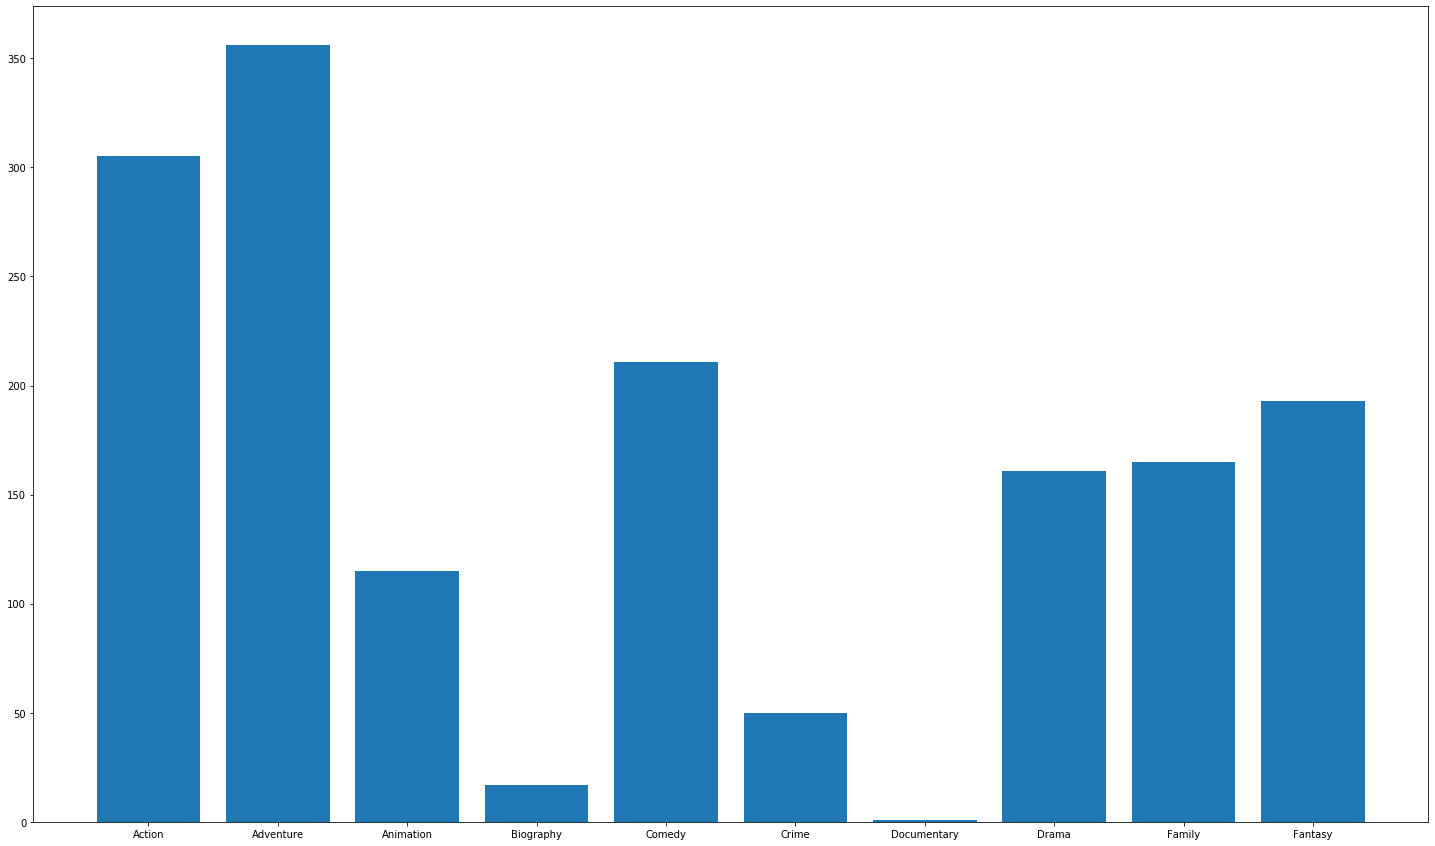

In [6]:
Genres_list = summary_df['Genres'].tolist()
new_genres_list = []
for genre in Genres_list:
    genre_2 = []
    genre_2.extend(genre.split(' '))
    new_genres_list.extend(genre_2)
new_genres_array = np.array(new_genres_list)
unique_elements, counts_elements = np.unique(new_genres_array, return_counts=True)
genres_dict = {}
unique_elements = list(unique_elements)[:10]
counts_elements = list(counts_elements)[:10]
plt.figure(figsize = (25, 15))
plt.bar(unique_elements, counts_elements)
plt.show()

In [7]:
budget_df = summary_df.sort_values(by = 'Budget', ascending = False)

In [8]:
budget_df_2 = budget_df.loc[budget_df['Profit'].isna() == False]

In [9]:
budget_df_3 = budget_df_2.iloc[100:]

In [10]:
budget_df_4 = budget_df_2.iloc[200:]

In [11]:
budget_df_5 = budget_df_2.iloc[300:]

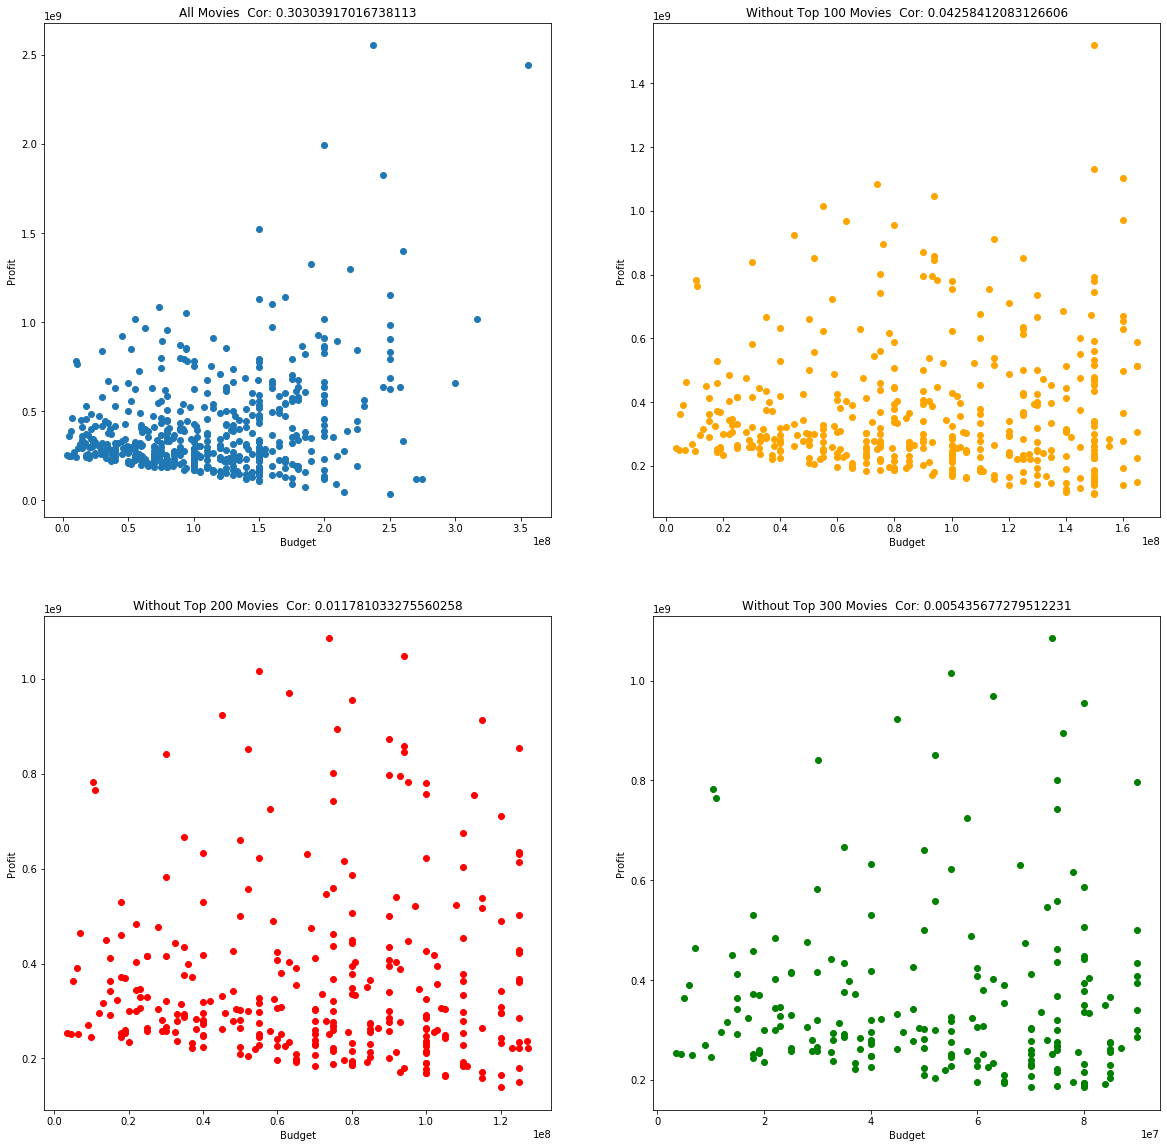

In [12]:
fig, axs = plt.subplots(2, 2, figsize = (20, 20))
axs[0, 0].scatter(budget_df_2['Budget'], budget_df_2['Profit'])
axs[0, 0].set_title('All Movies  Cor: ' + str(budget_df_2['Budget'].corr(budget_df_2['Profit'])))
axs[0, 1].scatter(budget_df_3['Budget'], budget_df_3['Profit'], color = 'orange')
axs[0, 1].set_title('Without Top 100 Movies  Cor: ' + str(budget_df_3['Budget'].corr(budget_df_3['Profit'])))
axs[1, 0].scatter(budget_df_4['Budget'], budget_df_4['Profit'], color = 'red')
axs[1, 0].set_title('Without Top 200 Movies  Cor: ' + str(budget_df_4['Budget'].corr(budget_df_4['Profit'])))
axs[1, 1].scatter(budget_df_5['Budget'], budget_df_5['Profit'], color = 'green')
axs[1, 1].set_title('Without Top 300 Movies  Cor: ' + str(budget_df_5['Budget'].corr(budget_df_5['Profit'])))

for ax in axs.flat:
    ax.set(xlabel='Budget', ylabel='Profit')


In [13]:
import seaborn as sns; sns.set()


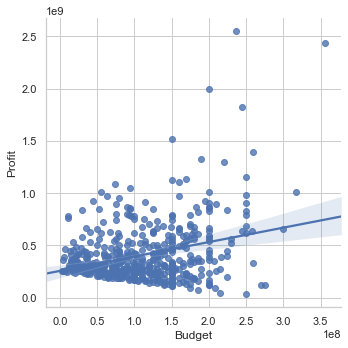

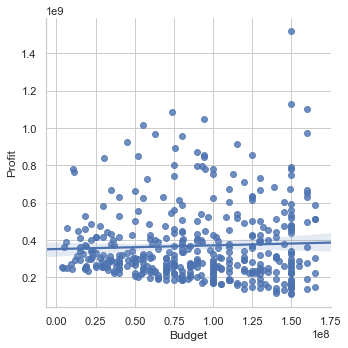

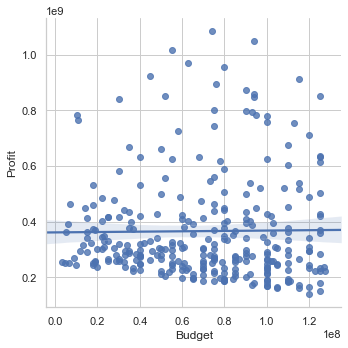

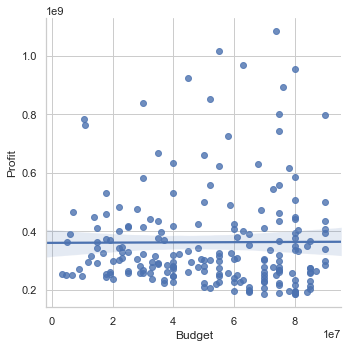

In [14]:
sns.set_style('whitegrid')
sns.set_color_codes()
current_palette = sns.color_palette()
budget_graph1 = sns.lmplot(x = 'Budget', y = 'Profit', data = budget_df_2)
budget_graph2 = sns.lmplot(x = 'Budget', y = 'Profit', data = budget_df_3)
budget_graph3 = sns.lmplot(x = 'Budget', y = 'Profit', data = budget_df_4)
budget_graph4 = sns.lmplot(x = 'Budget', y = 'Profit', data = budget_df_5)


# fig, axs = plt.subplots(2, 2, figsize = (20, 20))
# axs[0, 0].scatter(budget_df_2['Budget'], budget_df_2['Profit'])
# axs[0, 0].set_title('All Movies  Cor: ' + str(budget_df_2['Budget'].corr(budget_df_2['Profit'])))
# axs[0, 1].scatter(budget_df_3['Budget'], budget_df_3['Profit'], color = 'orange')
# axs[0, 1].set_title('Without Top 100 Movies  Cor: ' + str(budget_df_3['Budget'].corr(budget_df_3['Profit'])))
# axs[1, 0].scatter(budget_df_4['Budget'], budget_df_4['Profit'], color = 'red')
# axs[1, 0].set_title('Without Top 200 Movies  Cor: ' + str(budget_df_4['Budget'].corr(budget_df_4['Profit'])))
# axs[1, 1].scatter(budget_df_5['Budget'], budget_df_5['Profit'], color = 'green')
# axs[1, 1].set_title('Without Top 300 Movies  Cor: ' + str(budget_df_5['Budget'].corr(budget_df_5['Profit'])))

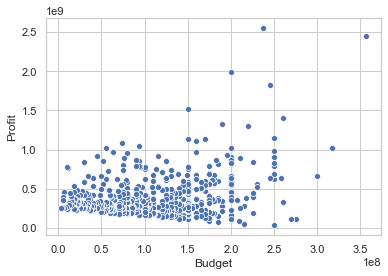

In [15]:
budget_graph1 = sns.scatterplot(x = 'Budget', y = 'Profit', data = budget_df_2, estimator = 'lm')

In [16]:
subplots = sns.load(ata = budget_df_2)

AttributeError: module 'seaborn' has no attribute 'load'

In [ ]:
budget_df_2['Budget'].corr(budget_df_2['Profit'])

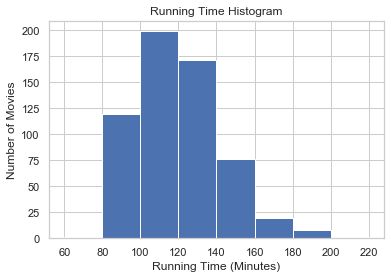

In [92]:
bins = [60,80,100,120,140,160,180,200,220]
summary_df['Running_Time_Minutes'].plot(kind = 'hist', bins = bins)
plt.title('Running Time Histogram')
plt.xlabel('Running Time (Minutes)')
plt.ylabel('Number of Movies')
plt.show()

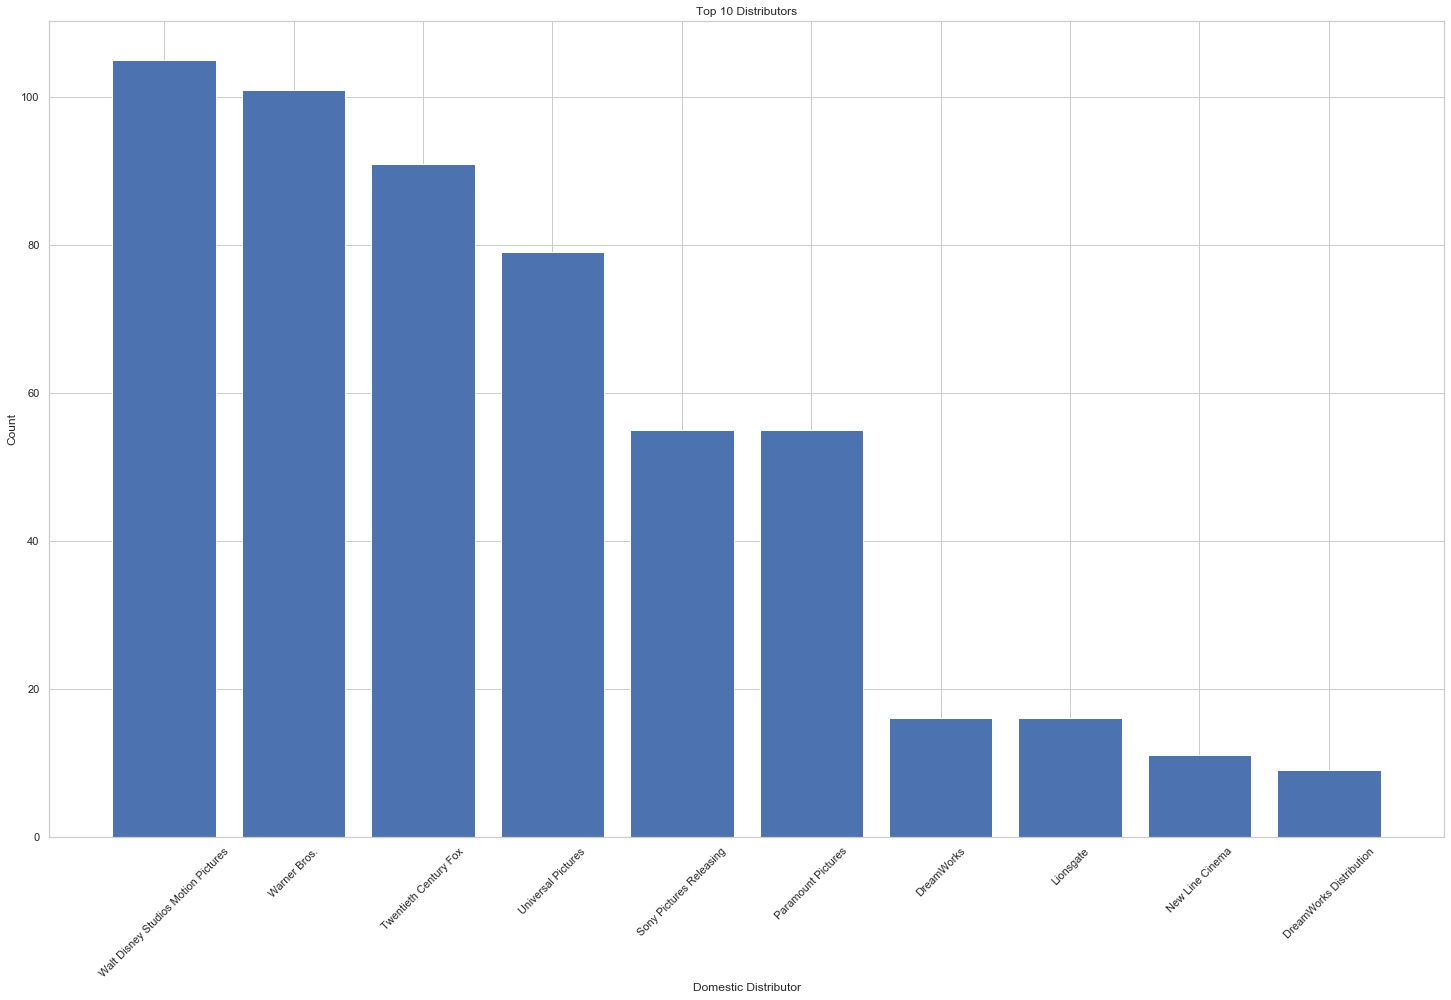

In [22]:
Studios_dict = dict(summary_df['Domestic_Distributor'].value_counts()[0:10])
Studio_names = Studios_dict.keys()
Studio_counts = Studios_dict.values()
plt.figure(figsize = (25, 15))
plt.bar(Studio_names, Studio_counts)
plt.title('Top 10 Distributors')
plt.xlabel('Domestic Distributor')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

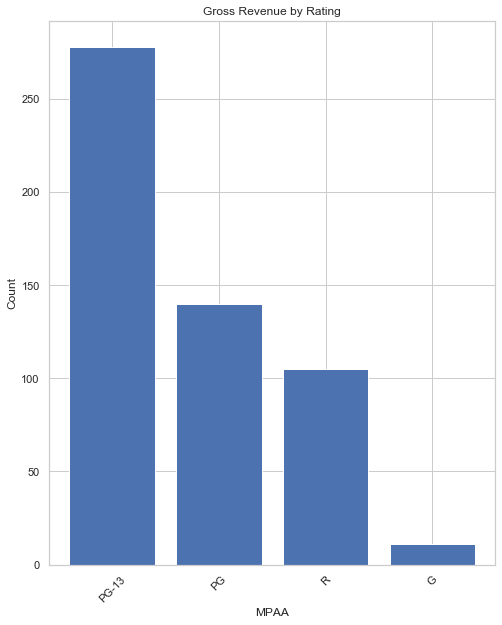

In [21]:
MPAA_dict = dict(summary_df['MPAA'].value_counts())
MPAA_names = MPAA_dict.keys()
MPAA_counts = MPAA_dict.values()
plt.figure(figsize = (8, 10))
plt.bar(MPAA_names, MPAA_counts)
plt.title('Gross Revenue by Rating')
plt.xlabel('MPAA')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [17]:
summary_df.head(10)

,Movie_Title,Lifetime_Gross,Domestic_Distributor,Budget,MPAA,Running_Time_Minutes,Genres,Profit
Lifetime_Gross_Rank,,,,,,,,
1.0,Avengers: Endgame,2.797800e+09,Walt Disney Studios Motion Pictures,356000000.0,PG-13,181.0,Action Adventure Drama Sci-Fi,2.441800e+09
2.0,Avatar,2.790440e+09,Twentieth Century Fox,237000000.0,PG-13,162.0,Action Adventure Fantasy Sci-Fi,2.553440e+09
3.0,Titanic,2.194440e+09,Paramount Pictures,200000000.0,PG-13,194.0,Drama Romance,1.994440e+09
4.0,Star Wars: Episode VII - The Force Awakens,2.068220e+09,Walt Disney Studios Motion Pictures,245000000.0,PG-13,138.0,Action Adventure Sci-Fi,1.823220e+09
5.0,Avengers: Infinity War,2.048360e+09,Walt Disney Studios Motion Pictures,NaN,PG-13,149.0,Action Adventure Sci-Fi,NaN
6.0,Jurassic World,1.670400e+09,Universal Pictures,150000000.0,PG-13,124.0,Action Adventure Sci-Fi,1.520400e+09
7.0,The Lion King,1.656940e+09,Walt Disney Studios Motion Pictures,260000000.0,PG,118.0,Adventure Animation Drama Family Musical,1.396940e+09
8.0,The Avengers,1.518810e+09,Walt Disney Studios Motion Pictures,220000000.0,PG-13,143.0,Action Adventure Sci-Fi,1.298810e+09
9.0,Furious 7,1.515050e+09,Universal Pictures,190000000.0,PG-13,137.0,Action Adventure Thriller,1.325050e+09


In [60]:
summary_df['Budget'].median()

105000000.0

In [20]:
budget_df.head(10)

,Movie_Title,Lifetime_Gross,Movie_Year,URL
Lifetime_Gross_Rank,,,,
1.0,Avengers: Endgame,2.797800e+09,2019.0,https://www.boxofficemojo.com/title/tt4154796/...
2.0,Avatar,2.790440e+09,2009.0,https://www.boxofficemojo.com/title/tt0499549/...
3.0,Titanic,2.194440e+09,1997.0,https://www.boxofficemojo.com/title/tt0120338/...
4.0,Star Wars: Episode VII - The Force Awakens,2.068220e+09,2015.0,https://www.boxofficemojo.com/title/tt2488496/...
5.0,Avengers: Infinity War,2.048360e+09,2018.0,https://www.boxofficemojo.com/title/tt4154756/...
6.0,Jurassic World,1.670400e+09,2015.0,https://www.boxofficemojo.com/title/tt0369610/...
7.0,The Lion King,1.656940e+09,2019.0,https://www.boxofficemojo.com/title/tt6105098/...
8.0,The Avengers,1.518810e+09,2012.0,https://www.boxofficemojo.com/title/tt0848228/...
9.0,Furious 7,1.515050e+09,2015.0,https://www.boxofficemojo.com/title/tt2820852/...


In [23]:
summary_df['Movie_Year'] = general_df['Movie_Year']

In [70]:
my_df = summary_df.loc[summary_df['Movie_Year'].isin(range(2017,2019))]

In [71]:
my_df

,Movie_Title,Lifetime_Gross,Domestic_Distributor,Budget,MPAA,Running_Time_Minutes,Genres,Profit,Movie_Year
Lifetime_Gross_Rank,,,,,,,,,
5.0,Avengers: Infinity War,2.048360e+09,Walt Disney Studios Motion Pictures,NaN,PG-13,149.0,Action Adventure Sci-Fi,NaN,2018.0
12.0,Black Panther,1.346910e+09,Walt Disney Studios Motion Pictures,NaN,PG-13,134.0,Action Adventure Sci-Fi,NaN,2018.0
14.0,Star Wars: Episode VIII - The Last Jedi,1.332540e+09,Walt Disney Studios Motion Pictures,317000000.0,PG-13,152.0,Action Adventure Fantasy Sci-Fi,1.015540e+09,2017.0
15.0,Jurassic World: Fallen Kingdom,1.308470e+09,Universal Pictures,170000000.0,PG-13,128.0,Action Adventure Sci-Fi,1.138470e+09,2018.0
17.0,Beauty and the Beast,1.263520e+09,Walt Disney Studios Motion Pictures,160000000.0,PG,129.0,Family Fantasy Musical Romance,1.103520e+09,2017.0
...,...,...,...,...,...,...,...,...,...
582.0,Blade Runner 2049,2.605120e+08,Warner Bros.,150000000.0,R,164.0,Action Drama Mystery Sci-Fi Thriller,1.105120e+08,2017.0
589.0,Kung Fu Yoga,2.577430e+08,Well Go USA Entertainment,65000000.0,None,107.0,Action Adventure Comedy Fantasy Mystery,1.927430e+08,2017.0
596.0,Halloween,2.554850e+08,Universal Pictures,10000000.0,R,106.0,Horror Thriller,2.454850e+08,2018.0


In [72]:
my_df_2 = my_df.loc[my_df['MPAA'] == 'PG-13']

In [73]:
my_df_2

,Movie_Title,Lifetime_Gross,Domestic_Distributor,Budget,MPAA,Running_Time_Minutes,Genres,Profit,Movie_Year
Lifetime_Gross_Rank,,,,,,,,,
5.0,Avengers: Infinity War,2.048360e+09,Walt Disney Studios Motion Pictures,NaN,PG-13,149.0,Action Adventure Sci-Fi,NaN,2018.0
12.0,Black Panther,1.346910e+09,Walt Disney Studios Motion Pictures,NaN,PG-13,134.0,Action Adventure Sci-Fi,NaN,2018.0
14.0,Star Wars: Episode VIII - The Last Jedi,1.332540e+09,Walt Disney Studios Motion Pictures,317000000.0,PG-13,152.0,Action Adventure Fantasy Sci-Fi,1.015540e+09,2017.0
15.0,Jurassic World: Fallen Kingdom,1.308470e+09,Universal Pictures,170000000.0,PG-13,128.0,Action Adventure Sci-Fi,1.138470e+09,2018.0
19.0,The Fate of the Furious,1.236010e+09,Universal Pictures,250000000.0,PG-13,136.0,Action Adventure Thriller,9.860100e+08,2017.0
23.0,Aquaman,1.148160e+09,Warner Bros.,NaN,PG-13,143.0,Action Adventure Fantasy Sci-Fi,NaN,2018.0
52.0,Jumanji: Welcome to the Jungle,9.621020e+08,Sony Pictures Releasing,90000000.0,PG-13,119.0,Action Adventure Comedy Fantasy,8.721020e+08,2017.0
61.0,Bohemian Rhapsody,9.036550e+08,Twentieth Century Fox,52000000.0,PG-13,134.0,Biography Drama Music,8.516550e+08,2018.0
67.0,Spider-Man: Homecoming,8.801670e+08,Sony Pictures Releasing,175000000.0,PG-13,133.0,Action Adventure Sci-Fi,7.051670e+08,2017.0


In [79]:
my_df_3 = my_df_2.loc[my_df['Running_Time_Minutes'].isin(range(80,140))]

In [89]:
my_df_4 = my_df_3.loc[my_df['Genres'].str.contains('Adventure')]

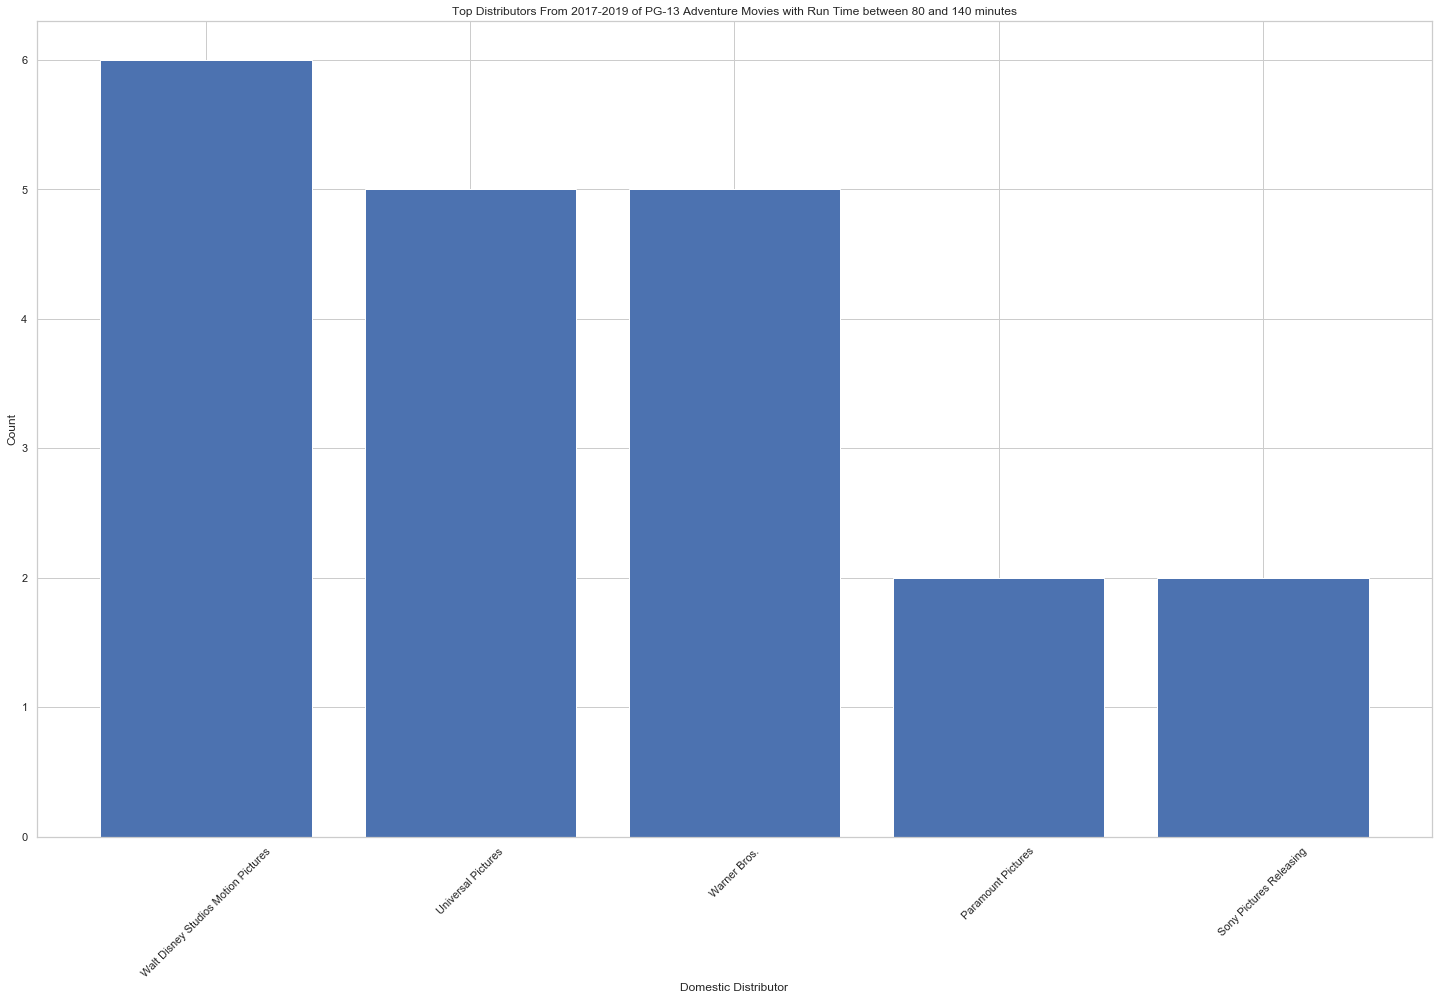

In [91]:
Studios_dict = dict(my_df_4['Domestic_Distributor'].value_counts()[0:10])
Studio_names = Studios_dict.keys()
Studio_counts = Studios_dict.values()
plt.figure(figsize = (25, 15))
plt.bar(Studio_names, Studio_counts)
plt.title('Top Distributors From 2017-2019 of PG-13 Adventure Movies with Run Time between 80 and 140 minutes')
plt.xlabel('Domestic Distributor')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [84]:
summary_df['Budget'].describe()

count    5.050000e+02
mean     1.120384e+08
std      6.251914e+07
min      3.500000e+06
25%      6.500000e+07
50%      1.050000e+08
75%      1.500000e+08
max      3.560000e+08
Name: Budget, dtype: float64

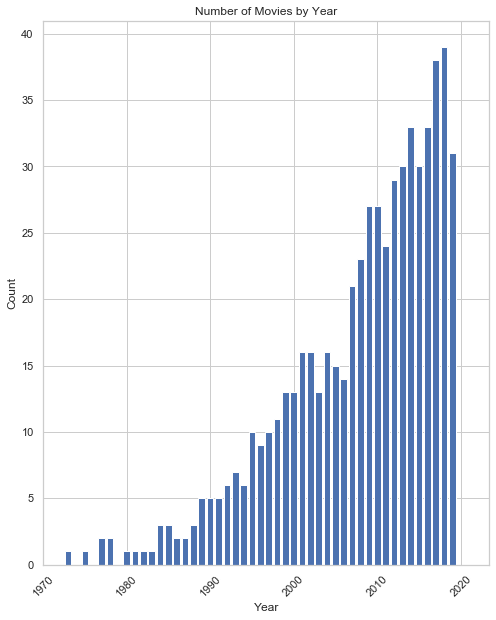

In [96]:
year_dict = dict(general_df['Movie_Year'].value_counts())
years = year_dict.keys()
year_counts = year_dict.values()
plt.figure(figsize = (8, 10))
plt.bar(years, year_counts)
plt.title('Number of Movies by Year')
plt.xlabel('Year')
plt.axis(xmin=1970)
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [97]:
years_values = general_df['Movie_Year'].value_counts()

In [99]:
decades_values = {"1970's": None, "1980's": None, "1990's": None, "2000's": None, "2010's": None}

In [106]:
decades_values["1970's"] = general_df.loc[general_df['Movie_Year'].isin(range(1970, 1980))]['Movie_Year'].count()

In [107]:
decades_values["1980's"] = general_df.loc[general_df['Movie_Year'].isin(range(1980, 1990))]['Movie_Year'].count()

In [108]:
decades_values["1990's"] = general_df.loc[general_df['Movie_Year'].isin(range(1990, 2000))]['Movie_Year'].count()

In [109]:
decades_values["2000's"] = general_df.loc[general_df['Movie_Year'].isin(range(2000, 2010))]['Movie_Year'].count()

In [110]:
decades_values["2010's"] = general_df.loc[general_df['Movie_Year'].isin(range(2010, 2020))]['Movie_Year'].count()

In [111]:
decades_values

{"1970's": 6, "1980's": 22, "1990's": 82, "2000's": 174, "2010's": 314}